# READ DATA

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.utils import resample

In [2]:
data=pd.read_csv('data/final_data_before_downsample.csv')
# data=pd.read_csv('data/filtered_data.csv')

Cancelled
False    5861080
True      106876
Name: count, dtype: int64


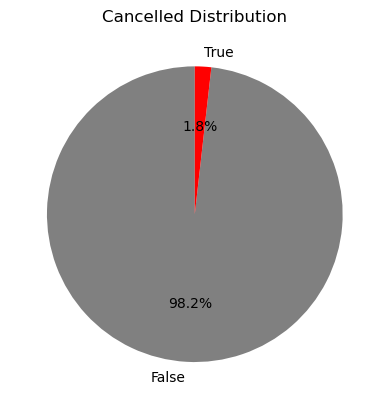

In [3]:
cancelled_counts = data['Cancelled'].value_counts()
print(cancelled_counts)
# Colors for each category
colors = {True: 'red', False: 'grey'}

# Plotting the pie chart
plt.pie(cancelled_counts, labels=cancelled_counts.index, autopct='%1.1f%%', startangle=90,
        colors=[colors[i] for i in cancelled_counts.index])
plt.title('Cancelled Distribution')
plt.show()

In [4]:
data.head()

,Airline,Origin,Dest,Cancelled,Quarter,Month,DayOfWeek,Operated_or_Branded_Code_Share_Partners,DepDelayMinutes,OriginState,...,arr-type,arr-elevation_ft,Route_Popularity,Distance_Final,Wind_Speed_mph,Wind_Gust_mph,Visibility_miles,tempF,precip_in,daily_snow_in
0,SkyWest Airlines Inc.,SGU,PHX,False,1,3,3,AA_CODESHARE,0.0,UT,...,large_airport,1135.0,937.0,422.246813,10.0,17.0,6.0,49,0.0,0.0
1,SkyWest Airlines Inc.,PHX,SGU,False,1,3,3,AA_CODESHARE,0.0,AZ,...,medium_airport,2941.0,937.0,422.246813,6.0,9.0,6.0,60,0.0,0.0
2,SkyWest Airlines Inc.,MHT,ORD,False,1,3,3,AA_CODESHARE,0.0,NH,...,large_airport,672.0,918.0,1356.657710,10.0,18.0,6.0,39,0.0,0.0
3,SkyWest Airlines Inc.,DFW,TRI,False,1,3,3,AA_CODESHARE,0.0,TX,...,large_airport,1519.0,568.0,1396.572313,10.0,16.0,6.0,65,0.0,0.0
4,SkyWest Airlines Inc.,PHX,BFL,False,1,3,3,AA_CODESHARE,0.0,AZ,...,medium_airport,510.0,1135.0,684.252343,21.0,35.0,6.0,71,0.0,0.0


# FILTER 20 biggest Airports

In [5]:
# Get the 20 most frequent values of 'Origin'
#top_20_origins = data['Origin'].value_counts().head(20).index.tolist()

# Filter the DataFrame to include only rows with 'Origin' values in top_20_origins
#data = data[data['Origin'].isin(top_20_origins)]

In [6]:
data.shape

(5967956, 24)

In [7]:
data.dtypes

Airline                                     object
Origin                                      object
Dest                                        object
Cancelled                                     bool
Quarter                                      int64
Month                                        int64
DayOfWeek                                    int64
Operated_or_Branded_Code_Share_Partners     object
DepDelayMinutes                            float64
OriginState                                 object
DestState                                   object
DepTimeBlk                                  object
dept-type                                   object
dept-elevation_ft                          float64
arr-type                                    object
arr-elevation_ft                           float64
Route_Popularity                           float64
Distance_Final                             float64
Wind_Speed_mph                             float64
Wind_Gust_mph                  

In [8]:
def print_unique_values(data):
    for col in data.select_dtypes(include=['object']).columns:
        unique_values = data[col].unique()
        print(f"Unique values for column '{col}': {unique_values}")

print_unique_values(data)


Unique values for column 'Airline': ['SkyWest Airlines Inc.' 'Horizon Air' 'United Air Lines Inc.'
 'Commutair Aka Champlain Enterprises, Inc.'
 'GoJet Airlines, LLC d/b/a United Express' 'Air Wisconsin Airlines Corp'
 'Southwest Airlines Co.' 'Mesa Airlines Inc.' 'Republic Airlines'
 'Spirit Air Lines' 'Delta Air Lines Inc.' 'Frontier Airlines Inc.'
 'Allegiant Air' 'Envoy Air' 'Comair Inc.' 'Endeavor Air Inc.'
 'American Airlines Inc.' 'Capital Cargo International'
 'Alaska Airlines Inc.' 'JetBlue Airways']
Unique values for column 'Origin': ['SGU' 'PHX' 'MHT' 'DFW' 'ORD' 'PSP' 'LBB' 'FWA' 'DRO' 'LAX' 'SFO' 'JLN'
 'SAF' 'ASE' 'HRL' 'DTW' 'GJT' 'SLC' 'FSM' 'FLG' 'GNV' 'ROW' 'SBN' 'MKE'
 'DEN' 'OKC' 'BNA' 'BMI' 'EUG' 'SHV' 'IAH' 'MDT' 'EGE' 'TVC' 'GRR' 'IND'
 'PIT' 'GRB' 'TRI' 'BUR' 'LFT' 'MFR' 'FAT' 'RDM' 'BIS' 'BRO' 'DSM' 'TLH'
 'GSO' 'SBP' 'MTJ' 'BIL' 'SJT' 'MAF' 'BFL' 'MFE' 'ONT' 'COS' 'FAR' 'CID'
 'LGB' 'ABQ' 'TUS' 'FSD' 'GRK' 'SYR' 'AMA' 'BTR' 'MSP' 'BHM' 'RNO' 'SEA'
 'MCI' 'PDX'

In [9]:
data.dtypes

Airline                                     object
Origin                                      object
Dest                                        object
Cancelled                                     bool
Quarter                                      int64
Month                                        int64
DayOfWeek                                    int64
Operated_or_Branded_Code_Share_Partners     object
DepDelayMinutes                            float64
OriginState                                 object
DestState                                   object
DepTimeBlk                                  object
dept-type                                   object
dept-elevation_ft                          float64
arr-type                                    object
arr-elevation_ft                           float64
Route_Popularity                           float64
Distance_Final                             float64
Wind_Speed_mph                             float64
Wind_Gust_mph                  

In [10]:
# DATA JACKIE
data = data.drop("DepDelayMinutes", axis=1)
data['target'] = data['Cancelled']
data = data.drop("Cancelled", axis=1)
data['target'] = np.where(data['target'], 1, 0)
#data = data.drop("Unnamed: 0", axis=1)
data.head()

,Airline,Origin,Dest,Quarter,Month,DayOfWeek,Operated_or_Branded_Code_Share_Partners,OriginState,DestState,DepTimeBlk,...,arr-elevation_ft,Route_Popularity,Distance_Final,Wind_Speed_mph,Wind_Gust_mph,Visibility_miles,tempF,precip_in,daily_snow_in,target
0,SkyWest Airlines Inc.,SGU,PHX,1,3,3,AA_CODESHARE,UT,AZ,0700-0759,...,1135.0,937.0,422.246813,10.0,17.0,6.0,49,0.0,0.0,0
1,SkyWest Airlines Inc.,PHX,SGU,1,3,3,AA_CODESHARE,AZ,UT,0900-0959,...,2941.0,937.0,422.246813,6.0,9.0,6.0,60,0.0,0.0,0
2,SkyWest Airlines Inc.,MHT,ORD,1,3,3,AA_CODESHARE,NH,IL,1300-1359,...,672.0,918.0,1356.657710,10.0,18.0,6.0,39,0.0,0.0,0
3,SkyWest Airlines Inc.,DFW,TRI,1,3,3,AA_CODESHARE,TX,TN,1600-1659,...,1519.0,568.0,1396.572313,10.0,16.0,6.0,65,0.0,0.0,0
4,SkyWest Airlines Inc.,PHX,BFL,1,3,3,AA_CODESHARE,AZ,CA,1800-1859,...,510.0,1135.0,684.252343,21.0,35.0,6.0,71,0.0,0.0,0


In [11]:
data['Origin'].nunique()

335

In [12]:
# columns_to_drop = ['Origin','Dest','OriginState','DestState']
columns_to_drop = ['Origin','Dest','DestState','OriginState',
                   'Operated_or_Branded_Code_Share_Partners',
                   'arr-type','arr-elevation_ft']
data = data.drop(columns_to_drop, axis=1)

target
0    5861080
1     106876
Name: count, dtype: int64


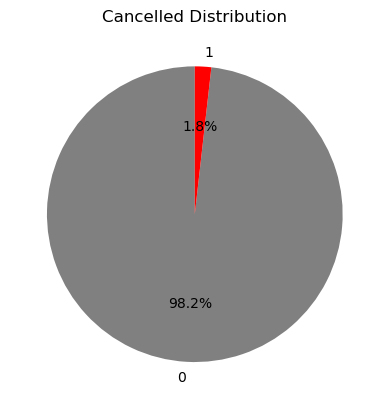

In [13]:
cancelled_counts = data['target'].value_counts()
print(cancelled_counts)
# Colors for each category
colors = {1: 'red', 0: 'grey'}

# Plotting the pie chart
plt.pie(cancelled_counts, labels=cancelled_counts.index, autopct='%1.1f%%', startangle=90,
        colors=[colors[i] for i in cancelled_counts.index])
plt.title('Cancelled Distribution')
plt.show()

# Train 3 Models with CV on Imputed Data (DOWNSAMPLED)

## Preprocessing

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

def preprocess_data(data):
    # Iterate over columns
    for col in data.columns:
        # Check if column is of object type
        if data[col].dtype == 'object':
            # Create dummy variables for object type column
            dummies = pd.get_dummies(data[col], prefix=col).astype(int)
            # Concatenate dummies with original dataframe
            data = pd.concat([data, dummies], axis=1)
    
    # Drop original object type columns
    data = data.select_dtypes(include=['number'])
    print("Shape after Dummies")
    print(data.shape) 
    return data

def preprocess_data(data):
    # Iterate over columns
    for col in data.columns:
        # Check if column is of object type
        if data[col].dtype == 'object' and col != 'target':
            # Create dummy variables for object type column
            dummies = pd.get_dummies(data[col], prefix=col).astype(int)
            # Concatenate dummies with original dataframe
            data = pd.concat([data, dummies], axis=1)
    
    # Drop original object type columns
    data = data.select_dtypes(include=['number'])
    
    # Scale numerical features except 'target'
    scaler = StandardScaler()
    numerical_cols = data.select_dtypes(include=['int', 'float']).columns.drop('target')
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    
    print("Shape after Dummies")
    print(data.shape) 
    return data

def preprocess_data_dummy(data):
    # Iterate over columns
    for col in data.columns:
        # Check if column is of object type and not 'target'
        if data[col].dtype == 'object' and col != 'target':
            # Create dummy variables for object type column
            dummies = pd.get_dummies(data[col], prefix=col).astype(int)
            # Concatenate dummies with original dataframe
            data = pd.concat([data, dummies], axis=1)
    
    # Drop original object type columns
    data = data.select_dtypes(include=['number'])
    
    # Scale numerical features except 'target'
    scaler = StandardScaler()
    numerical_cols = data.select_dtypes(include=['int', 'float']).columns.drop('target')
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    
    print("Shape after Dummies")
    print(data.shape) 
    return data


def preprocess_data_no_dummy(data):
    # Exclude 'target' column from scaling
    cols_to_scale = data.select_dtypes(include=['int', 'float']).columns.drop('target')
    
    # Scale numerical features
    scaler = StandardScaler()
    data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])
    
    print("Shape after No Dummies")
    print(data.shape) 
    return data


def separate_blind_dataset(df, size=10000, stratify_col=None):
    np.random.seed(123)
    if stratify_col and size <= df[stratify_col].nunique():
        _, blind_set = train_test_split(df, test_size=size, stratify=df[stratify_col], random_state=123)
    else:
        blind_indices = np.random.choice(df.index, size=size, replace=False)
        blind_set = df.loc[blind_indices]
    return blind_set

def downsample_majority_class(data, minority_class_label='target', random_state=123):
    data_majority = data[data[minority_class_label] == 0]
    data_minority = data[data[minority_class_label] == 1]
    print("shape of minority class")
    print(data_minority.shape)
    data_majority_downsampled = resample(data_majority, replace=False, n_samples=len(data_minority), random_state=random_state)
    return pd.concat([data_majority_downsampled, data_minority])

# Models

In [15]:
def train_logistic_regression(X_train, y_train, param_grid):
    log_reg = LogisticRegression(random_state=123)
    grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

def train_random_forest(X_train, y_train, param_grid):
    rf_clf = RandomForestClassifier(random_state=123)
    grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

def train_neural_network(X_train, y_train, param_grid):
    nn_clf = MLPClassifier(random_state=123)
    grid_search = GridSearchCV(nn_clf, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    metrics = {
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'accuracy': accuracy_score(y_test, y_pred)
    }
    return metrics

def evaluate_on_blind_set(model, blind_set, minority_class_label='target'):
    X_blind = blind_set.drop(columns=[minority_class_label])
    y_blind = blind_set[minority_class_label]
    
    evaluation_metrics = evaluate_model(model, X_blind, y_blind)
    
    return evaluation_metrics

def run_pipeline_undersampling(data, param_grids):
    preprocessed_data = preprocess_data(data)
    blind_set = separate_blind_dataset(preprocessed_data, size=2000, stratify_col='target')
    data_remaining = preprocessed_data.drop(blind_set.index)
    
    X = data_remaining.drop(columns=['target'])
    y = data_remaining['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
    
    downsampled_data = downsample_majority_class(pd.concat([X_train, y_train], axis=1))
    X_train_downsampled = downsampled_data.drop(columns=['target'])
    y_train_downsampled = downsampled_data['target']
    
    best_models = {}
    for clf_name, (train_fn, param_grid) in param_grids.items():
        best_model = train_fn(X_train_downsampled, y_train_downsampled, param_grid)
        best_models[clf_name] = best_model
        
        # Print the best parameters for the current model
        if isinstance(best_model, GridSearchCV):
            print(f"Best parameters for {clf_name}: {best_model.best_params_}")
        else:
            print(f"Best parameters for {clf_name}: {best_model.get_params()}")
        
    return X_train, X_test, y_test, blind_set, best_models

def run_pipeline_undersampling_2(data, param_grids):
    preprocessed_data = preprocess_data(data)
    preprocessed_data_dummy = preprocess_data_no_dummy(data)
    
    best_models = {}
    for clf_name, (train_fn, param_grid) in param_grids.items():
        if clf_name == 'Random Forest':
            preprocessed_data_current = preprocessed_data_dummy
        else:
            preprocessed_data_current = preprocessed_data
            
        blind_set = separate_blind_dataset(preprocessed_data_current, size=2000, stratify_col='target')
        data_remaining = preprocessed_data_current.drop(blind_set.index)
        
        X = data_remaining.drop(columns=['target'])
        y = data_remaining['target']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
        
        downsampled_data = downsample_majority_class(pd.concat([X_train, y_train], axis=1))
        X_train_downsampled = downsampled_data.drop(columns=['target'])
        y_train_downsampled = downsampled_data['target']
        
        best_model = train_fn(X_train_downsampled, y_train_downsampled, param_grid)
        best_models[clf_name] = best_model
        
        # Print the best parameters for the current model
        if isinstance(best_model, GridSearchCV):
            print(f"Best parameters for {clf_name}: {best_model.best_params_}")
        else:
            print(f"Best parameters for {clf_name}: {best_model.get_params()}")
        
    return X_train, X_test, y_test, blind_set, best_models

## Run models:

In [16]:
# Define parameter grids for hyperparameter tuning
param_grids = {
    'Logistic Regression': (train_logistic_regression, {'C': [0.1, 1, 10, 100], 'max_iter': [100]}),
    'Random Forest': (train_random_forest, {'n_estimators': [100], 'max_depth': [20,30,40], 'min_samples_leaf': [1, 5, 10]}),
    'Neural Network': (train_neural_network, {'hidden_layer_sizes': [(100,), (200,), (50, 50)], 'alpha': [0.0001], 'max_iter': [200]})
}


# Run the pipeline
X_train, X_test, y_test, blind_set, models_undersampling = run_pipeline_undersampling(data, param_grids)

Shape after Dummies
(5967956, 56)
shape of minority class
(85475, 56)
Best parameters for Logistic Regression: {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 123, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best parameters for Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 40, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}


/Users/jakobkuemmerle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jakobkuemmerle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jakobkuemmerle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jakobkuemmerle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for Neural Network: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 123, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/Users/jakobkuemmerle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# EVALUATE BEST MODEL ON TEST

In [17]:
# Evaluate models on the test set
test_evaluation_results = {}
for clf_name, model in models_undersampling.items():
    test_evaluation_results[clf_name] = evaluate_model(model, X_test, y_test)

# Display evaluation metrics for the test set
for clf_name, evaluation_metrics in test_evaluation_results.items():
    print(f"Performance of {clf_name} on the Test Set:")
    print("Confusion Matrix:\n", evaluation_metrics['confusion_matrix'])
    print("Precision: {:.2f}".format(evaluation_metrics['precision']))
    print("Recall: {:.2f}".format(evaluation_metrics['recall']))
    print("F1 Score: {:.2f}".format(evaluation_metrics['f1_score']))
    print("Accuracy: {:.2f}".format(evaluation_metrics['accuracy']))
    print()


Performance of Logistic Regression on the Test Set:
Confusion Matrix:
 [[744728 427095]
 [  7782  13587]]
Precision: 0.03
Recall: 0.64
F1 Score: 0.06
Accuracy: 0.64

Performance of Random Forest on the Test Set:
Confusion Matrix:
 [[913454 258369]
 [  4163  17206]]
Precision: 0.06
Recall: 0.81
F1 Score: 0.12
Accuracy: 0.78

Performance of Neural Network on the Test Set:
Confusion Matrix:
 [[899114 272709]
 [  5480  15889]]
Precision: 0.06
Recall: 0.74
F1 Score: 0.10
Accuracy: 0.77



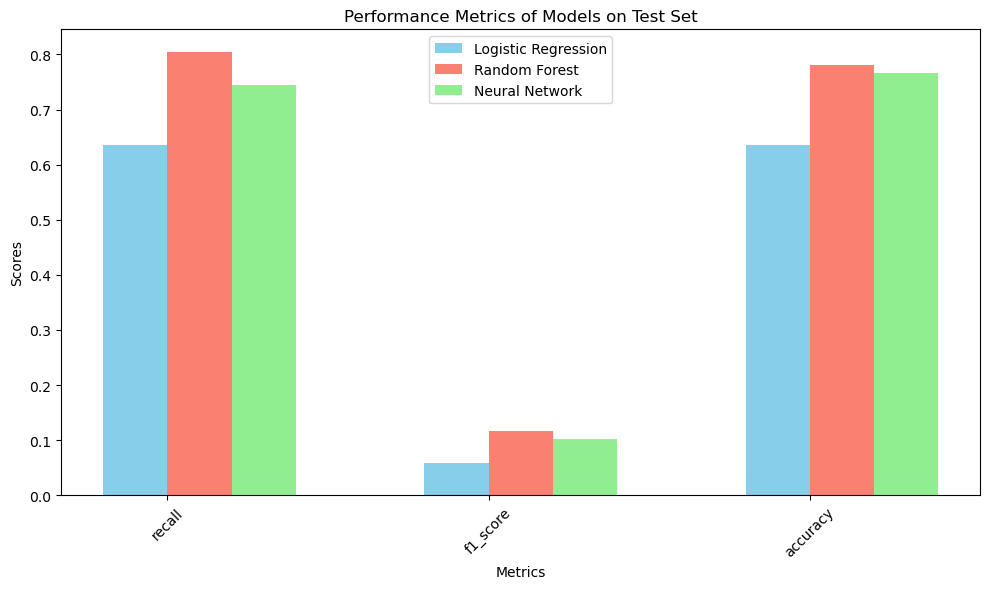

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and corresponding metric values
model_names = list(test_evaluation_results.keys())
metrics = ['recall', 'f1_score', 'accuracy']
metric_values = {metric: [test_evaluation_results[model][metric.lower()] for model in model_names] for metric in metrics}

# Define colors for each model
colors = ['skyblue', 'salmon', 'lightgreen']

# Create color dictionary mapping each model to a color
model_colors = {model: color for model, color in zip(model_names, colors)}

# Create bar chart
bar_width = 0.2
index = np.arange(len(metrics))

plt.figure(figsize=(10, 6))

for i, model in enumerate(model_names):
    model_metric_values = [test_evaluation_results[model][metric.lower()] for metric in metrics]
    plt.bar(index + i * bar_width, model_metric_values, bar_width, label=model, color=model_colors[model])

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Metrics of Models on Test Set')
plt.xticks(index + 0.5 * bar_width, metrics)
plt.legend(loc='upper center')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Feature Importance

In [18]:
models_undersampling

{'Logistic Regression': LogisticRegression(C=0.1, random_state=123),
 'Random Forest': RandomForestClassifier(max_depth=40, random_state=123),
 'Neural Network': MLPClassifier(hidden_layer_sizes=(50, 50), random_state=123)}

In [19]:

rf_model = models_undersampling['Random Forest']

# Get feature names
feature_names = X_train.columns

# Get feature importances
feature_importances = rf_model.feature_importances_

# Combine feature names and importances
features_and_importances = zip(feature_names, feature_importances)

# Sorting the features by importance
sorted_features_and_importances = sorted(features_and_importances, key=lambda x: x[1], reverse=True)

# Printing the sorted features and their importances
for feature, importance in sorted_features_and_importances:
    print(f"{feature}: {importance}")


tempF: 0.11220069990614226
Month: 0.09321988592489941
Distance_Final: 0.0923281240558375
Route_Popularity: 0.09076840640087387
dept-elevation_ft: 0.0783219923386613
Wind_Gust_mph: 0.07538137075622381
Wind_Speed_mph: 0.06479266201216877
DayOfWeek: 0.06048454012803656
Visibility_miles: 0.02855091723964464
Airline_Delta Air Lines Inc.: 0.026321728929415252
Quarter: 0.02534126328097848
daily_snow_in: 0.024990024009401226
Airline_Endeavor Air Inc.: 0.011874402385431167
precip_in: 0.010209850736917301
Airline_Southwest Airlines Co.: 0.009487581058643122
Airline_American Airlines Inc.: 0.00943977128259911
Airline_SkyWest Airlines Inc.: 0.008075870847125374
DepTimeBlk_0700-0759: 0.006891464575701311
DepTimeBlk_1800-1859: 0.006870767899653795
DepTimeBlk_1700-1759: 0.006764773796528319
DepTimeBlk_0600-0659: 0.006677658611755997
DepTimeBlk_0800-0859: 0.006582110438008348
DepTimeBlk_1400-1459: 0.006313558184938886
DepTimeBlk_1600-1659: 0.00630080155609325
DepTimeBlk_1000-1059: 0.006289713370292460

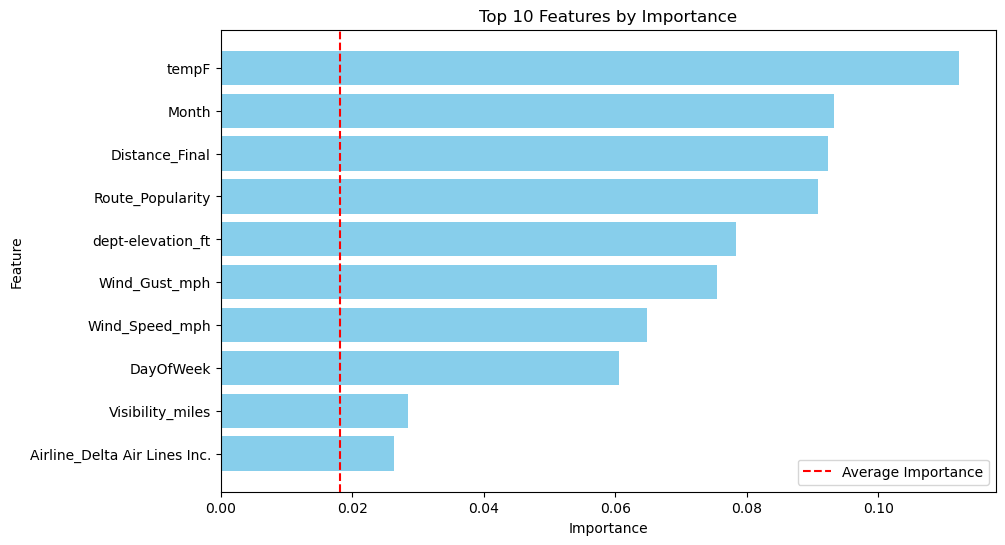

In [20]:
import matplotlib.pyplot as plt

# Extract top 10 features and their importances
top_10_features = [feature for feature, _ in sorted_features_and_importances[:10]]
top_10_importances = [importance for _, importance in sorted_features_and_importances[:10]]

# Calculate the average feature importance
average_importance = sum(importance for _, importance in sorted_features_and_importances) / len(sorted_features_and_importances)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the top 10 features
plt.barh(top_10_features, top_10_importances, color='skyblue')
# Plot the average feature importance
plt.axvline(x=average_importance, color='red', linestyle='--', label='Average Importance')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features by Importance')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
plt.show()


# EVALUATE ON BLIND DATA (Not sure if still necessary)

In [21]:
# Evaluate undersampling models on the blind test set
blind_evaluation_results = {}
for clf_name, model in models_undersampling.items():
    blind_evaluation_results[clf_name] = evaluate_on_blind_set(model, blind_set)

# Display evaluation metrics for the blind test set
for clf_name, evaluation_metrics in blind_evaluation_results.items():
    print(f"Performance of {clf_name} on the Blind Test Set:")
    print("Confusion Matrix:\n", evaluation_metrics['confusion_matrix'])
    print("Precision: {:.2f}".format(evaluation_metrics['precision']))
    print("Recall: {:.2f}".format(evaluation_metrics['recall']))
    print("F1 Score: {:.2f}".format(evaluation_metrics['f1_score']))
    print("Accuracy: {:.2f}".format(evaluation_metrics['accuracy']))
    print()

Performance of Logistic Regression on the Blind Test Set:
Confusion Matrix:
 [[1264  704]
 [  10   22]]
Precision: 0.03
Recall: 0.69
F1 Score: 0.06
Accuracy: 0.64

Performance of Random Forest on the Blind Test Set:
Confusion Matrix:
 [[1508  460]
 [   6   26]]
Precision: 0.05
Recall: 0.81
F1 Score: 0.10
Accuracy: 0.77

Performance of Neural Network on the Blind Test Set:
Confusion Matrix:
 [[1480  488]
 [   8   24]]
Precision: 0.05
Recall: 0.75
F1 Score: 0.09
Accuracy: 0.75

